# 루브릭

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?<br/>
학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음<br/><br/>
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음<br/><br/>
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
60% 이상 도달하였음

In [3]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [4]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import os

### 데이터 준비

In [5]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [152]:
s_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
r_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
p_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

In [189]:
resize_images(s_image_dir_path)
resize_images(r_image_dir_path)
resize_images(p_image_dir_path)

500  images to be resized.
500  images resized.
500  images to be resized.
500  images resized.
500  images to be resized.
500  images resized.


 - 가위, 바위, 보 각각 500장씩 총 1500장 사진 학습

In [190]:
import numpy as np

def load_data_train(img_path, number_of_data=1500):  # 가위 바위 보 총 900개의 이미지 사용(3명의 데이터 혼합)
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [191]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data_train(image_dir_path)

학습데이터(x_train)의 이미지 개수는 1500 입니다.


In [192]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [193]:
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


In [194]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_norm, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=34)

In [195]:
def load_data_test(img_path, number_of_data=500):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img 
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("x_test의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [196]:
rock_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
paper_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
scissor_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

resize_images(rock_dir_path)
resize_images(paper_dir_path)
resize_images(scissor_dir_path)

(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
x_test의 이미지 개수는 300 입니다.
x_test shape: (500, 28, 28, 3)
y_test shape: (500,)


- test 이미지는 기존에 주어지는 이미지로 가위, 바위, 보 100장 씩 총 300장을 이용하여 진행합니다.

라벨:  1


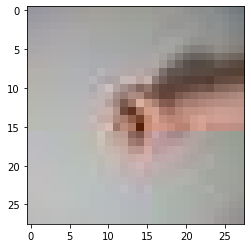

In [197]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [230]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


n_channel_1 = 32
n_channel_2 = 64
#n_channel_3 = 32
n_dense = 16
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
#model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2)) 
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 16)                25616     
_________________________________________________________________
dropout_38 (Dropout)         (None, 16)              

- Conv2D, MaxPool2D로 이루어진 4개의 층과 6개의 층으로 비교해보았는데 6개의 층은 생각보다 test accuracy가 좋지 못하여 4개의 층으로 사용
- 컨볼루션의 출력 필터는 32, 64개로 설정
- Dropout을 이용하여 20%의 노드들에 적용

In [231]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_valid, y_valid))

Epoch 1/15
38/38 [==============================] - 1s 8ms/step - loss: 1.0812 - accuracy: 0.3967 - val_loss: 1.0384 - val_accuracy: 0.5600
Epoch 2/15
38/38 [==============================] - 0s 4ms/step - loss: 0.9670 - accuracy: 0.5658 - val_loss: 0.8647 - val_accuracy: 0.5900
Epoch 3/15
38/38 [==============================] - 0s 4ms/step - loss: 0.7542 - accuracy: 0.6842 - val_loss: 0.5746 - val_accuracy: 0.8633
Epoch 4/15
38/38 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7967 - val_loss: 0.3839 - val_accuracy: 0.9167
Epoch 5/15
38/38 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8475 - val_loss: 0.2999 - val_accuracy: 0.9200
Epoch 6/15
38/38 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8817 - val_loss: 0.2228 - val_accuracy: 0.9400
Epoch 7/15
38/38 [==============================] - 0s 4ms/step - loss: 0.2786 - accuracy: 0.9083 - val_loss: 0.1837 - val_accuracy: 0.9567
Epoch 8/15
38/38 [==

In [181]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

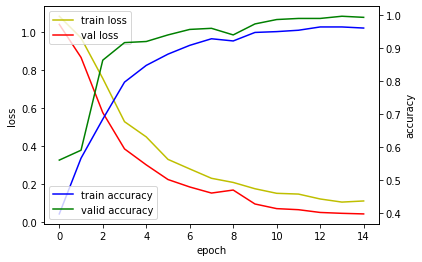

In [232]:
%matplotlib inline
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

- train에서 오버피팅이 일어나지 않았음을 확인

In [233]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

16/16 - 0s - loss: 1.9137 - accuracy: 0.6760
test_loss: 1.9136962890625 
test_accuracy: 0.6759999990463257


 루브릭 기준인 test accuracy가 60%이상으로 나온것을 확인

## 회고

- 생각보다 test accuracy의 값이 원하는 만큼 나오지 않아 많은 반복을 하였다.
- 처음에는 이미지를 총 300개를 넣고 하였지만 터무니 없는 성적이 나와서 훈련 데이터의 부족으로 생각하여 900, 1200, 1500개로 늘려가며 학습을 진행하여 1500개일때 원하는 성능이 나왔다.
- 어떠한 이미지를 쓰는지도 중요하다고 생각된다. 처음 학습을 시키기위해 넣은 이미지는 배경에 다른 사물들도 많았으며 손 모양이 정확하게 보이지 않아 모델의 성능이 낮게 나왔다고 생각된다. 그 이후로는 최대한 배경에는 아무것도 나오지 않고 손모양도 다양한 각도로 잘 보이게 찍어 학습을 시키니 원하는 점수가 나왔다.
- 또한 그냥 학습시키는 것이 아닌 vaildation data나 dropout과 같은 overfiting을 방지하는 것을 추가하는 것도 중요하다고 알게되었다.